In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2
import os


In [ ]:
# import zipfile
# with zipfile.ZipFile('/content/drive/MyDrive/6_train.zip','r') as zip_ref:
#   zip_ref.extractall('/content/drive/MyDrive/fruit_classification')

In [ ]:
files_list=os.listdir("/content/drive/MyDrive/fruit_classification/train/train")
#count number of files
num_files=len(files_list)

In [ ]:
print(num_files)

33


In [ ]:
import os, shutil
from pathlib import Path
original_dir = Path("/content/drive/MyDrive/fruit_classification/train/train")
new_base_dir = Path("/content/drive/MyDrive/segregated_fruits")
splits = ["train", "validation", "test"]
train_split = 0.7
val_split = 0.15
test_split = 0.15
for fruit_class in os.listdir(original_dir):
    class_path = original_dir / fruit_class
    images = sorted(os.listdir(class_path))

    total = len(images)
    train_end = int(train_split * total)
    val_end = train_end + int(val_split * total)

    split_ranges = {
        "train": images[:train_end],
        "validation": images[train_end:val_end],
        "test": images[val_end:]
    }

    for split in splits:
        split_dir = new_base_dir / split / fruit_class
        split_dir.mkdir(parents=True, exist_ok=True)

        for fname in split_ranges[split]:
            src = class_path / fname
            dst = split_dir / fname
            shutil.copyfile(src, dst)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
base_dir = "/content/drive/MyDrive/segregated_fruits"
img_size = (224, 224)
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=base_dir + '/train',
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'  # required for sparse_categorical_crossentropy
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=base_dir + '/validation',
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=base_dir + '/test',
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Detected {num_classes} fruit classes:", class_names)

Found 11785 files belonging to 33 classes.
Found 2507 files belonging to 33 classes.
Found 2558 files belonging to 33 classes.
Detected 33 fruit classes: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


In [ ]:
class_names = train_ds.class_names
print(class_names)
print("Total classes:", len(class_names))

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
Total classes: 33


In [ ]:
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)


In [ ]:
for images,labels in train_ds.take(1):
    print("Image batch shape:", images.shape)

Image batch shape: (32, 224, 224, 3)


In [ ]:
for images, labels in train_ds.take(1):
    print("Labels (as integers):", labels.numpy())


Labels (as integers): [ 6 18 16  1  5 13 26 22  2 19 28  1  8 13  5 32  9 30 11 13 22  5 32  6
 15  4 17  8 27  3 29 13]


In [ ]:
for images,labels in test_ds.take(1):
    print("Image batch shape:", images.shape)

Image batch shape: (32, 224, 224, 3)


In [ ]:
for images,labels in val_ds.take(1):
    print("Image batch shape:", images.shape)

Image batch shape: (32, 224, 224, 3)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(2, 2),

#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),

#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),

#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')  # 33 classes
# ])


In [ ]:
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )


In [ ]:
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=10
# )


In [ ]:
# test_loss, test_accuracy = model.evaluate(test_ds)
# print(f"Test Accuracy: {test_accuracy:.2f}")


In [ ]:
# import matplotlib.pyplot as plt

# # Plot accuracy
# plt.plot(history.history['accuracy'], label='train_accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy')
# plt.legend()
# plt.show()

# # Plot loss
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Model Loss')
# plt.legend()
# plt.show()


In [ ]:
# from keras.applications import VGG16
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, Dropout

# # Load VGG16 without top layer
# vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze pre-trained layers
# for layer in vgg_base.layers:
#     layer.trainable = False

# # Build the model
# vg_model = Sequential()
# vg_model.add(vgg_base)
# vg_model.add(Flatten())
# vg_model.add(Dense(256, activation='relu'))
# vg_model.add(Dropout(0.5))
# vg_model.add(Dense(128, activation='relu'))
# vg_model.add(Dense(num_classes, activation='softmax'))  # 33 classes


In [ ]:
# vg_model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )


In [ ]:
# model_history = vg_model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=10
# )

In [ ]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False
mobile_model = Sequential()
mobile_model.add(base_model)
mobile_model.add(Flatten())
mobile_model.add(Dense(256, activation='relu'))
mobile_model.add(Dropout(0.5))
mobile_model.add(Dense(128, activation='relu'))
mobile_model.add(Dense(33, activation='softmax'))  # 33 classes in fruit dataset
mobile_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = mobile_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 1700s 5s/step - accuracy: 0.5944 - loss: 1.5504 - val_accuracy: 0.9992 - val_loss: 0.0117
Epoch 2/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 926s 2s/step - accuracy: 0.9616 - loss: 0.1341 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 3/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 838s 2s/step - accuracy: 0.9813 - loss: 0.0678 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 4/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 923s 2s/step - accuracy: 0.9839 - loss: 0.0526 - val_accuracy: 1.0000 - val_loss: 2.8532e-04
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.9838 - loss: 0.0507 - val_accuracy: 0.9996 - val_loss: 5.6850e-04
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 907s 2s/step - accuracy: 0.9923 - loss: 0.0285 - val_accuracy: 1.0000 - val_loss: 3.1161e-04
Epoch 7/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 941s 3s/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 1.0000 - val_loss: 2.7811e-04
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 981s 3s/step - accuracy: 0.9895 - loss: 

In [ ]:
mobile_model.evaluate(test_ds)

80/80 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - accuracy: 1.0000 - loss: 2.1583e-05


[3.810073758359067e-05, 1.0]

In [ ]:
mobile_model.save("mobilenet_fruit_model.h5")


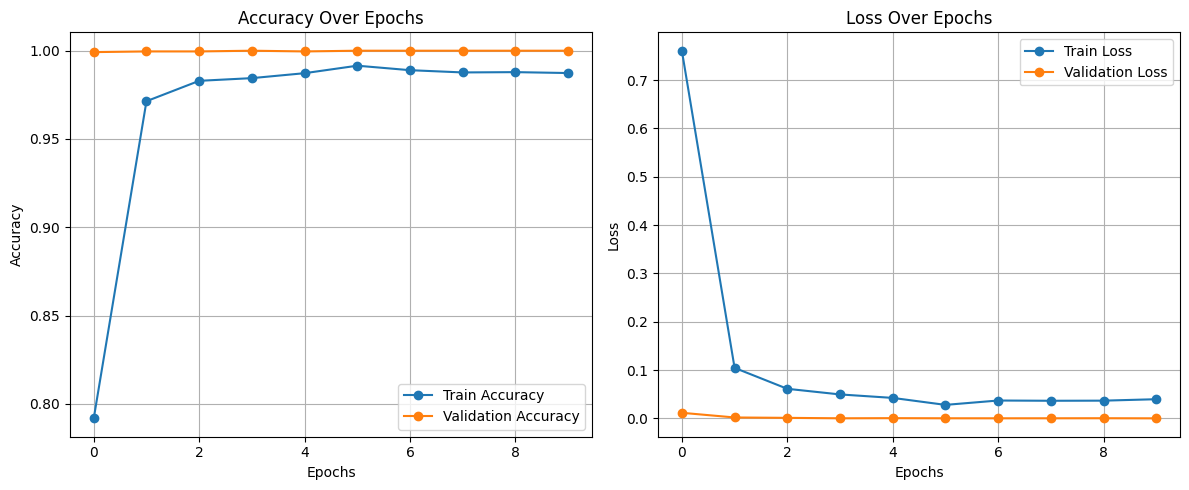

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
img = Image.open("/content/apple.webp").convert("RGB")
img.save("/content/apple.jpg")


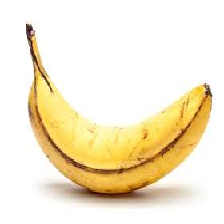

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: Banana


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display

img_path = "/content/banana.jpg"
img = image.load_img(img_path, target_size=(224, 224))

# Display the image being predicted
display(img)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = mobile_model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print("Predicted class:", predicted_class)

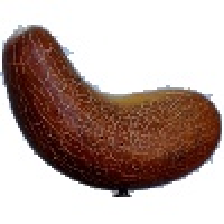

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: Cucumber Ripe


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display

img_path = "/content/Cucumber Ripe_3.jpg"
img = image.load_img(img_path, target_size=(224, 224))
display(img)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = mobile_model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print("Predicted class:", predicted_class)

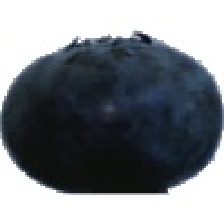

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: Blueberry


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display

img_path = "/content/Blueberry_8.jpg"
img = image.load_img(img_path, target_size=(224, 224))
display(img)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = mobile_model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print("Predicted class:", predicted_class)

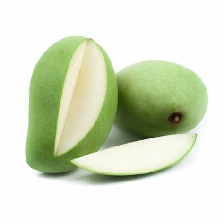

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: Pear


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display

img_path = "/content/OIP1-1745902853219.webp"
img = image.load_img(img_path, target_size=(224, 224))
display(img)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = mobile_model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print("Predicted class:", predicted_class)

In [ ]:
# for file in bad_images:
#     os.remove(file)
